<a href="https://colab.research.google.com/github/keirabasma/Formation-IA/blob/main/Workshop1_BELLILI_Bouchra_PART1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install pandas numpy matplotlib seaborn

In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
print("Libraries are successfully loaded")

Libraries are successfully loaded


In [20]:
from google.colab import files
uploaded = files.upload()

In [117]:
df = pd.read_csv("AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       184 non-null    object 
 1   Open       184 non-null    float64
 2   High       184 non-null    float64
 3   Low        184 non-null    float64
 4   Close      184 non-null    float64
 5   Adj Close  184 non-null    float64
 6   Volume     184 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.2+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,184.000000,184.000000,184.000000,184.000000,184.000000,1.840000e+02
mean,127.040245,129.918098,124.340381,127.352663,123.838032,1.910168e+08
std,24.314449,24.577906,24.176736,24.356534,25.655569,8.160281e+07
min,92.389999,93.769997,89.470001,90.519997,87.796822,3.839850e+07
25%,108.882499,112.362499,106.152502,109.204998,105.301765,1.273706e+08
50%,118.895000,120.865002,116.870003,119.190002,114.999730,1.744112e+08
75%,144.935005,147.695000,143.227493,144.704994,143.039467,2.207755e+08
max,180.289993,183.500000,177.619995,179.979996,179.979996,5.003630e+08


In [98]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [99]:
df['Daily_Return'] = df['Close'].pct_change()

# Moyennes mobiles avec Pandas
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

# Moyenne mobile avec NumPy
df['MA_30'] = np.convolve(df['Close'], np.ones(30)/30, mode='same')

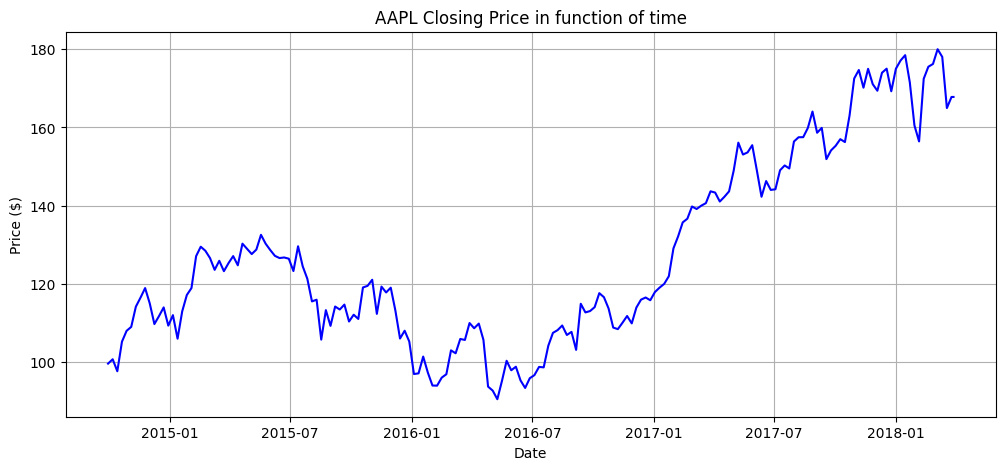

In [100]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Close'],color='blue')
plt.title("AAPL Closing Price in function of time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid()
plt.show()

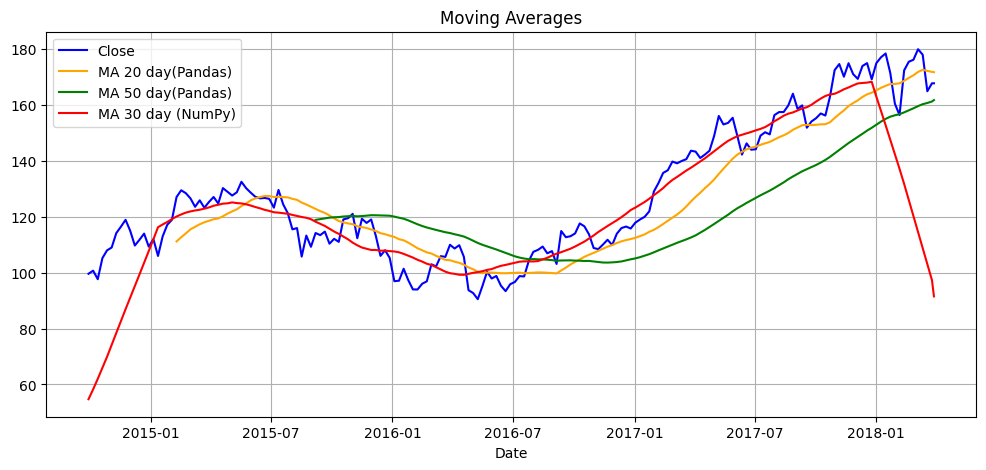

In [101]:
plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Close', color='blue')
plt.plot(df['MA_20'], label='MA 20 day(Pandas)',color='orange')
plt.plot(df['MA_50'], label='MA 50 day(Pandas)',color='green')
plt.plot(df['MA_30'], label='MA 30 day (NumPy)',color='red' )
plt.xlabel("Date")
plt.legend()
plt.title("Moving Averages")
plt.grid()
plt.show()

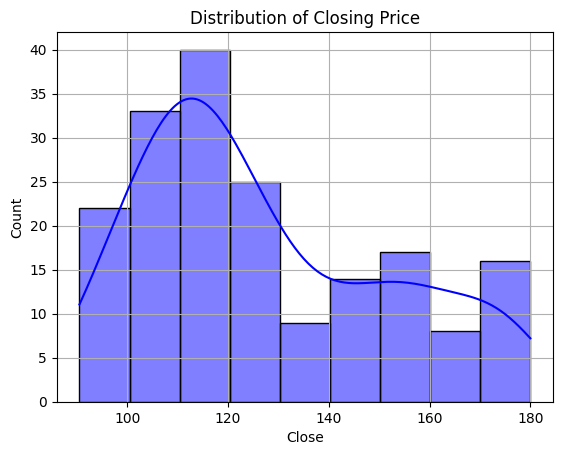

In [102]:
sns.histplot(df['Close'], kde=True, color='blue')
plt.title("Distribution of Closing Price")
plt.grid()
plt.show()

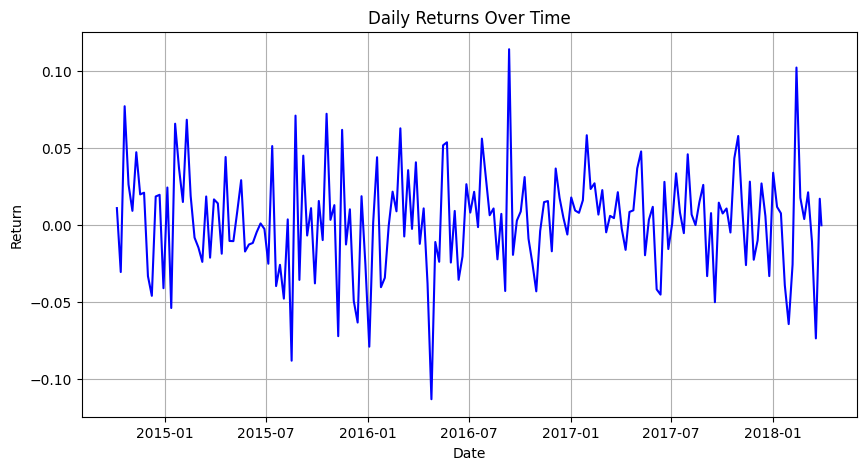

In [103]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Daily_Return'],color='blue')
plt.title("Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Return")
plt.grid()
plt.show()

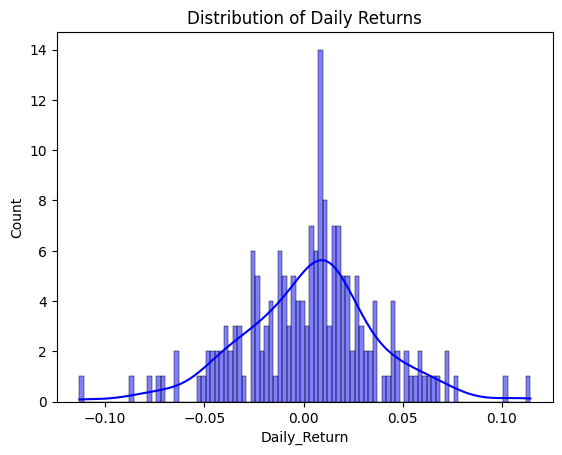

In [104]:
sns.histplot(df['Daily_Return'], bins=100, kde=True, color='blue')
plt.title("Distribution of Daily Returns")
plt.show()

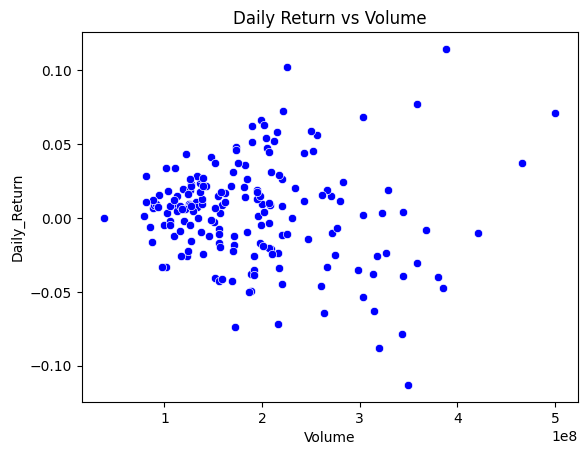

In [105]:
sns.scatterplot(x=df['Volume'], y=df['Daily_Return'],color='blue')
plt.title("Daily Return vs Volume")
plt.show()

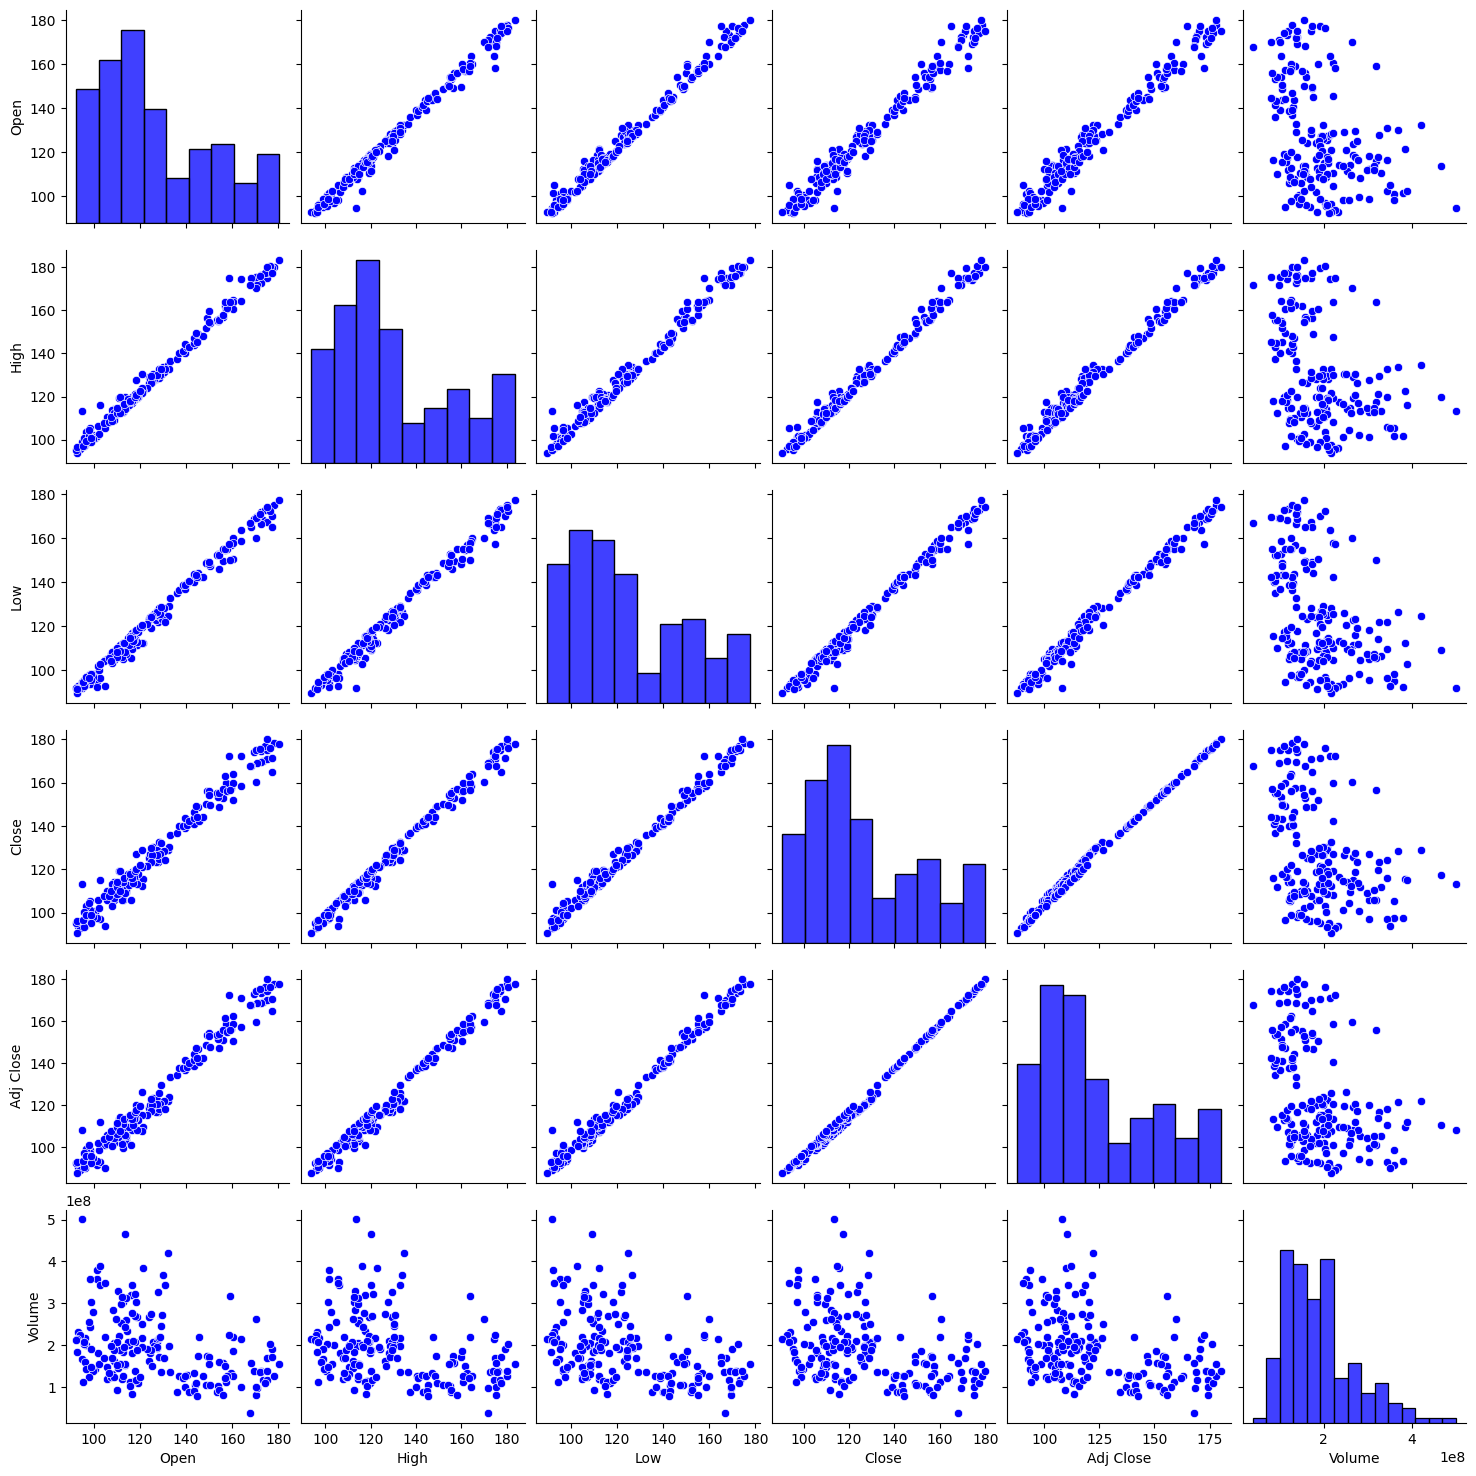

In [106]:
sns.pairplot(
    df[["Open","High","Low","Close","Adj Close","Volume"]],
    plot_kws={'color': 'blue'},
    diag_kws={'color': 'blue',
              'fill': True}
)

plt.show()


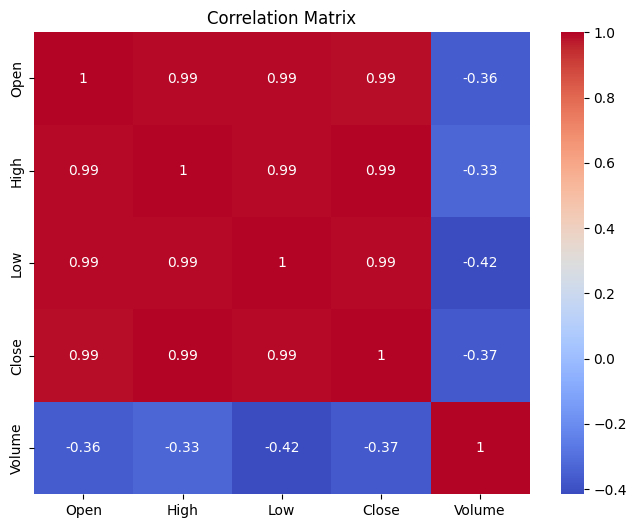

In [107]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Open','High','Low','Close','Volume']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [108]:
fig = px.line(df, y="Close", title="AAPL Stock Price (Interactive)")
fig.show()

In [109]:
fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
)])

fig.update_layout(title="AAPL Candlestick Chart",
                  xaxis_title="Date",
                  yaxis_title="Price ($)")
fig.show()

In [110]:
fig = px.histogram(
    df,
    x="Daily_Return",
    nbins=100,
    title="Daily Return Distribution",
    color_discrete_sequence=['blue']  # couleur unique
)
fig.show()

In [111]:
import plotly.express as px

# Scatter plot
fig = px.scatter(df,
                 x='Low',
                 y='High',
                 title='AAPL: Daily High and Low Price Comparison',
                 labels={'Low':'Low Price', 'High':'High Price'},
                 hover_data=['Open', 'Close', 'Volume'],color_discrete_sequence=['blue'] )
fig.show()